# Example for Lift Analysis

In [1]:
from matplotlib import pyplot as plt
from wingstructure import data, analysis
import numpy as np

## Definition of wing

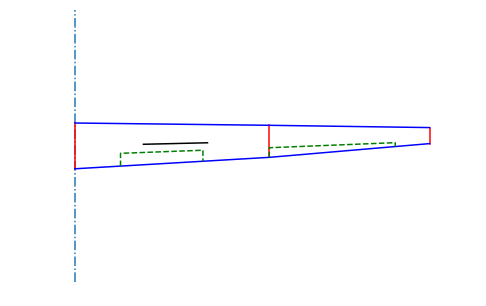

In [10]:
# create wing object
wing = data.Wing()

# add sections to wing
wing.add_section(data.Point(0.0, 0.0, 0.0), 1.0, 0.0)
wing.add_section(data.Point(0.05, 4.25, 0.0), 0.7, 0.0)
wing.add_section(data.Point(0.1, 7.75, 0.0), 0.35, 0.0)

# set fuselage with (=root of wing) to zero
wing.set_root_pos(0.0)

# define spoiler position
wing.set_spoiler(1.5, 2.9)

# define control-surfaces
wing.set_flap('flap', 1, 2.8,[0.7,0.7])
wing.set_flap('flap2', 4.25, 7, [0.7,0.8])

# display simple wing
plt.figure(figsize=(8,5))
wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Programmieren/wingstructure/wingstructure/analysis.py:33: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


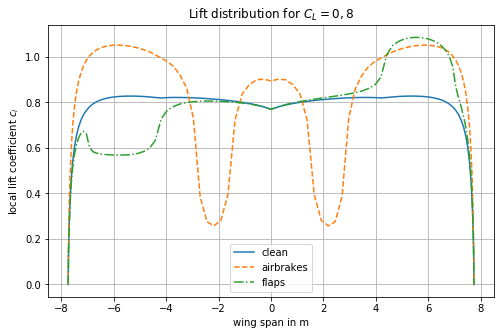

In [11]:
liftana = analysis.LiftAnalysis(wing)

span_pos = liftana.calc_ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8, return_C_Di=True)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            flap_deflections={'flap2': [5, -5]}, return_C_Di=True)
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, air_brake=True, return_C_Di=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')